### Imports

In [1]:
import numpy as np 
from src.hopfield import HopfieldNetwork
from src.utils import build_mean_imagepx, plot_digits
from src.preprocessing import load_data

import warnings
warnings.filterwarnings("ignore")

2025-08-27 14:28:23.170150: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-27 14:28:23.221477: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-27 14:28:24.436941: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


### Load data

In [2]:
# Load mnist data
images, labels = load_data()

2025-08-27 14:28:24.854186: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-27 14:28:24.930424: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-08-27 14:28:37.888254: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Data Preprocessing

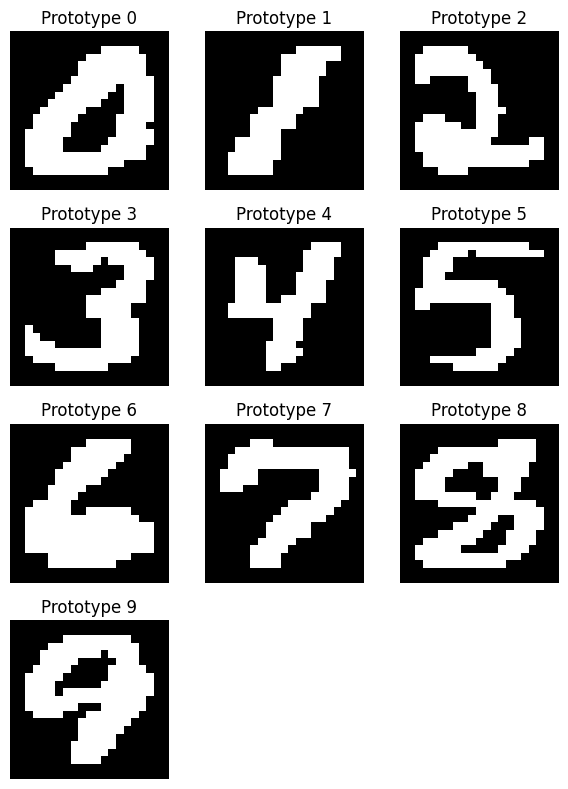

In [3]:
patterns, draw_patterns = build_mean_imagepx(images, labels, resize_shape=(21,21), threshold=30) # patterns for training
 
# Plot the Patterns
prototype_titles = [f"Prototype {i}" for i in range(len(patterns))]
plot_digits(draw_patterns, shape=(21,21), titles=prototype_titles)

### Train and Evaluate model

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 2
Differences recalled  vs distorted: 132
----------------------------------------------------------------------------------------------------


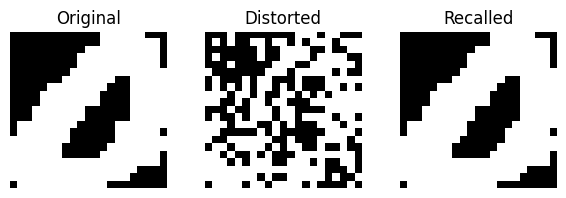

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 0
Differences recalled  vs distorted: 132
----------------------------------------------------------------------------------------------------


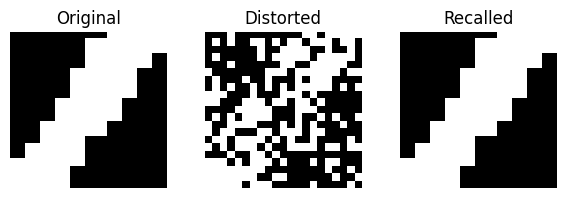

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 0
Differences recalled  vs distorted: 132
----------------------------------------------------------------------------------------------------


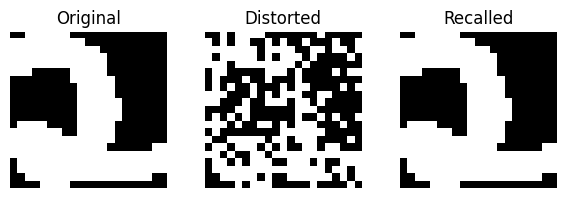

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 1
Differences recalled  vs distorted: 131
----------------------------------------------------------------------------------------------------


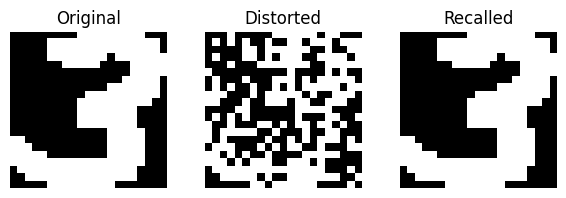

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 44
Differences recalled  vs distorted: 148
----------------------------------------------------------------------------------------------------


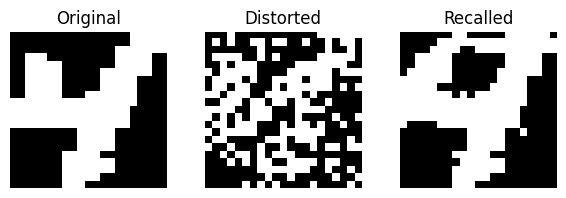

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 45
Differences recalled  vs distorted: 145
----------------------------------------------------------------------------------------------------


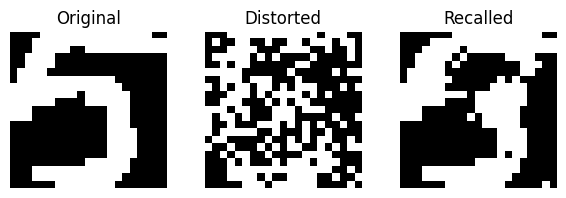

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 38
Differences recalled  vs distorted: 146
----------------------------------------------------------------------------------------------------


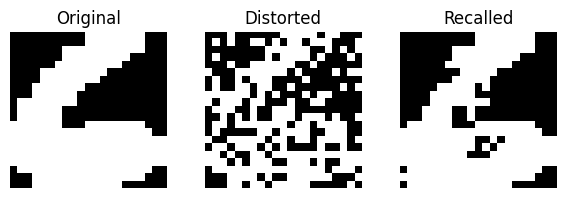

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 52
Differences recalled  vs distorted: 144
----------------------------------------------------------------------------------------------------


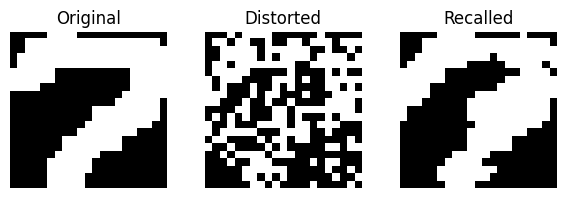

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 15
Differences recalled  vs distorted: 131
----------------------------------------------------------------------------------------------------


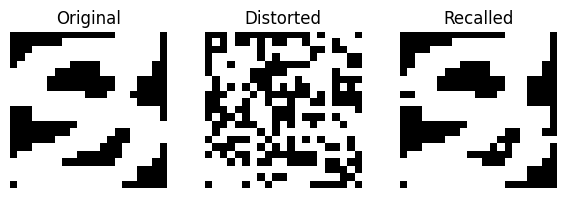

Testing with 10 patterns stored:
Differences distorted vs original pattern: 132
Differences recalled  vs original pattern: 30
Differences recalled  vs distorted: 140
----------------------------------------------------------------------------------------------------


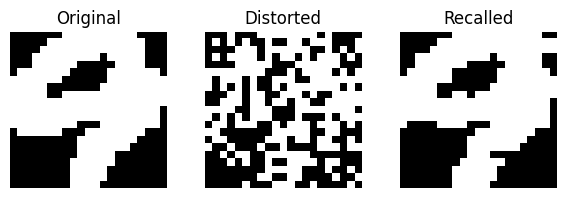

In [4]:
# Currently Stores 10 PATTERNS/DIGITS  
# Uncomment below and adjust indentation to make it 5 PATTERNS and a better recall
 
# for i in range(5,15,5):        
    # proto_set = patterns[i-5:i].copy() 
proto_set = patterns.copy()

# Initialize Hopfield with the set of patterns
H = HopfieldNetwork(proto_set)
H.train()

for j in range(len(proto_set)):
    test_digit = j
    original_proto = proto_set[test_digit].copy()

    # Distortion Calculation
    rng = np.random.default_rng(42)
    n_flips = int(0.3 * original_proto.size) # Using 30% noise
    flip_idx = rng.choice(original_proto.size, size=n_flips, replace=False)

    # Create distorted single image
    distorted = original_proto.copy()
    distorted[flip_idx] = -distorted[flip_idx]

    recalled = H.predict(distorted, max_steps=6) # prediction

    # Comparisons
    print(f"Testing with {len(proto_set)} patterns stored:")
    print("Differences distorted vs original pattern:", np.sum(distorted != original_proto))
    print("Differences recalled  vs original pattern:", np.sum(recalled  != original_proto))
    print("Differences recalled  vs distorted:", np.sum(recalled  != distorted))
    print("-" * 100)

    # Use the plot_digits function to display the images
    images_to_plot = np.array([original_proto, distorted, recalled])
    titles = ["Original", "Distorted", "Recalled"]
    plot_digits(images_to_plot, shape=(21,21), titles=titles)